In [38]:
import numpy as np
import pandas as pd
import seaborn as sns
sns.set(style='whitegrid')
sns.set_palette('bright')
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.figure_factory as ff
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from scipy import fftpack
import datetime
from sklearn import mixture
import warnings
warnings.filterwarnings('ignore')
from scipy import fft
from scipy import signal
import math
from acoustics.cepstrum import complex_cepstrum
from acoustics.cepstrum import inverse_complex_cepstrum
from scipy.spatial import distance

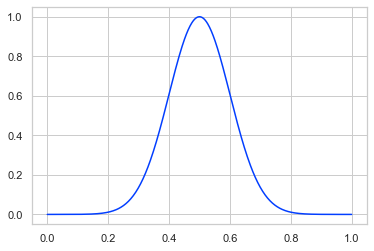

In [39]:
t = np.linspace(0, 1, 500)
s = signal.gaussian(500, std=50)
plt.plot(t, s)

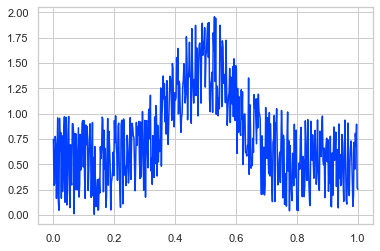

In [40]:
t2 = np.linspace(0, 1, 500)
noise = np.random.random(500)
s2 = s + noise
plt.plot(t2, s2)

In [41]:
from scipy.stats import wasserstein_distance

In [42]:
wasserstein_distance(s,s2)

0.521558771662884

In [43]:
signal_1 = pd.DataFrame(zip(t,s),columns=['Time','Value'])
signal_2 = pd.DataFrame(zip(t2,s2),columns=['Time','Value'])

In [44]:
def jaccard(dff, dfj):
    a = 0
    intersect =[]
    union = []
    n1 = np.array(dff.Value)
    n2 = np.array(dfj.Value)
    n1 = np.append(n1,n2.max())
    n1 = np.append(n1,n2.min())
    n2 = np.append(n2,n1.max())
    n2 = np.append(n2,n1.min())
    count1, bin_edges1 = np.histogram(n2, bins=20)
    count2, bin_edges2 = np.histogram(n1, bins=20)

    for x in range(count1.shape[0]):
        intersect.append(min(count1[x],count2[x]))
    intersect = np.array([intersect])
    isum = intersect.sum()

    for x in range(count1.shape[0]):
        union.append(max(count1[x],count2[x]))
    union = np.array([union])
    usum = union.sum()

    jacc1 = isum/usum
            #x = wasserstein_distance(dff.value,dfj.value)
    a = jacc1
    return a

In [45]:
jaccard(signal_1,signal_2)

0.2954838709677419

# FFT - Real and Imag

In [46]:
def freq(df):
    N = df.shape[0]
    y = np.array(df['Value'])
    f = fftpack.fftfreq(len(y))
    yf = fftpack.fft(y)
    fft_data1 = pd.DataFrame(zip(f,yf.real),columns=['Freq','Ampli'])
    fft_data2 = pd.DataFrame(zip(f,yf.imag),columns=['Freq','Ampli'])
    return fft_data1,fft_data2

(-0.1, 0.1)

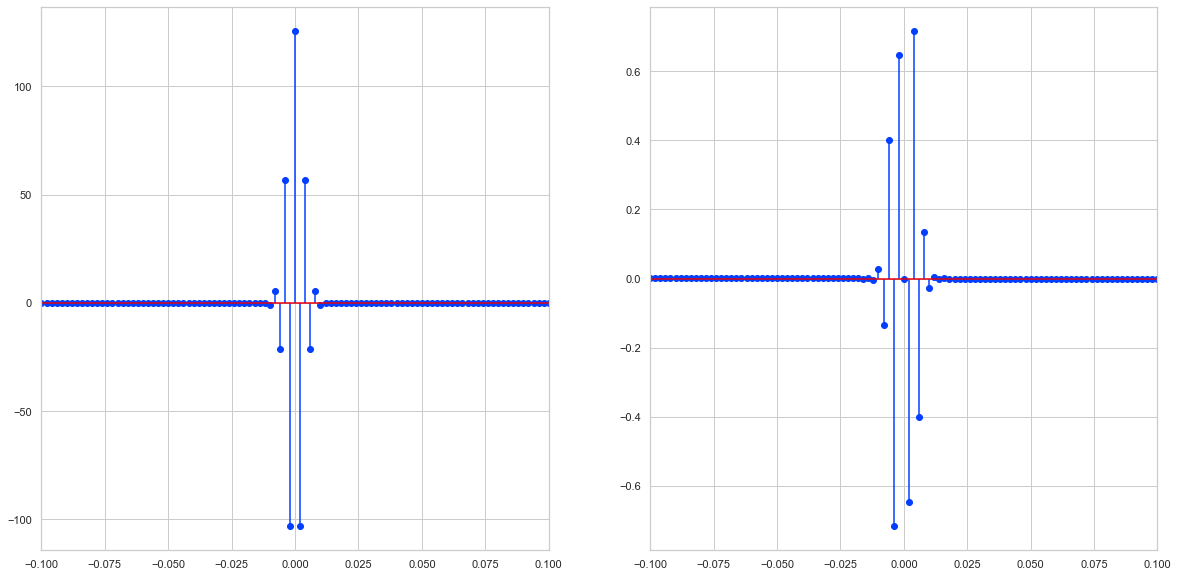

In [47]:
freq_ampli1,freq_ampli1i = freq(signal_1)
fig, axs = plt.subplots(1,2,figsize=(20,10))
axs[0].stem(freq_ampli1['Freq'], freq_ampli1['Ampli'])
axs[0].set_xlim(-0.1, 0.1)
axs[1].stem(freq_ampli1i['Freq'], freq_ampli1i['Ampli'])
axs[1].set_xlim(-0.1, 0.1)

<StemContainer object of 3 artists>

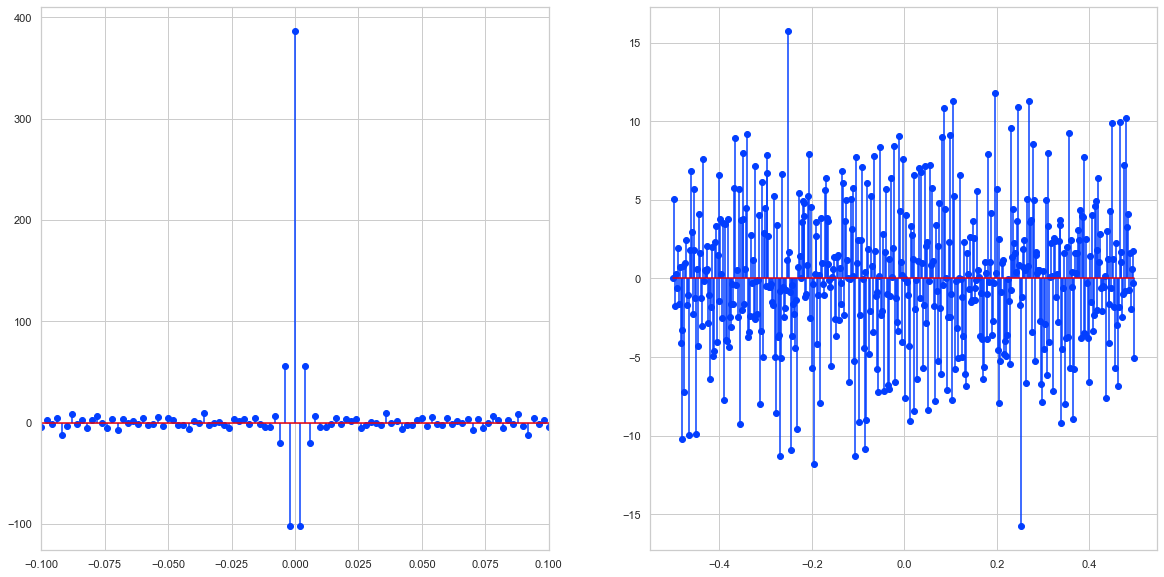

In [48]:
freq_ampli2,freq_ampli2i = freq(signal_2)
fig, axs = plt.subplots(1,2,figsize=(20,10))
axs[0].stem(freq_ampli2['Freq'], freq_ampli2['Ampli'])
axs[0].set_xlim(-0.1, 0.1)
axs[1].stem(freq_ampli2i['Freq'], freq_ampli2i['Ampli'])

In [49]:
print("Real: ",wasserstein_distance(freq_ampli1['Ampli'], freq_ampli2['Ampli']))
print("Imaginary", wasserstein_distance(freq_ampli1i['Ampli'], freq_ampli2i['Ampli']))

Real:  3.927229942175582
Imaginary 3.4850204784955356


In [50]:
freq_ampli1.rename(columns = {'Ampli':'Value'}, inplace = True)
freq_ampli2.rename(columns = {'Ampli':'Value'}, inplace = True)
print(jaccard(freq_ampli1,freq_ampli2))
freq_ampli1.rename(columns = {'Value': 'Ampli'}, inplace = True)
freq_ampli2.rename(columns = {'Value': 'Ampli'}, inplace = True)

0.8354661791590493


In [51]:
freq_ampli1i.rename(columns = {'Ampli':'Value'}, inplace = True)
freq_ampli2i.rename(columns = {'Ampli':'Value'}, inplace = True)
print(jaccard(freq_ampli1i,freq_ampli2i))
freq_ampli1i.rename(columns = {'Value': 'Ampli'}, inplace = True)
freq_ampli2i.rename(columns = {'Value': 'Ampli'}, inplace = True)

0.1895734597156398


# FFT - Magnitude and phase

In [52]:
#Func gives magnitude of FFT provide dataframe in Time Domain
def freq_mag(df):
    N = df.shape[0]
    y = np.array(df['Value'])
    f = fftpack.fftfreq(len(y))
    yf = fftpack.fft(y)
    fft_data = pd.DataFrame(zip(f,np.abs(yf)),columns=['Freq','Ampli'])
    return fft_data

In [53]:
def freq_phase(df):
    N = df.shape[0]
    y = np.array(df['Value'])
    f = fftpack.fftfreq(len(y))
    yf = fftpack.fft(y)
    fft_data1 = pd.DataFrame(zip(f,np.angle(yf)),columns=['Freq','Phase'])
    return fft_data1

<StemContainer object of 3 artists>

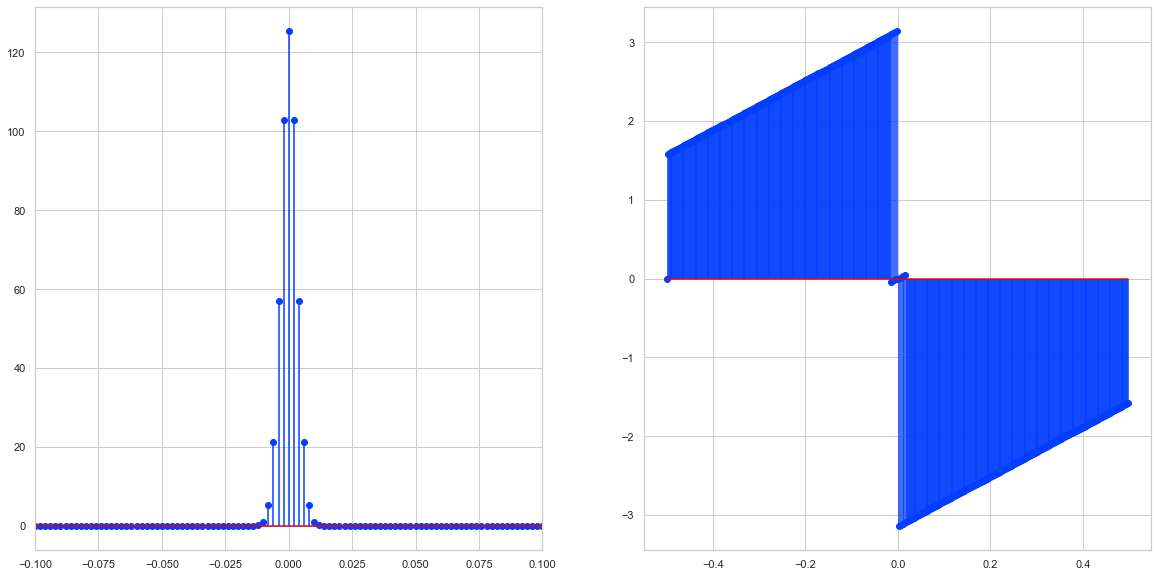

In [54]:
freq_ampli_mag1 = freq_mag(signal_1)
freq_ampli_phase1 = freq_phase(signal_1)
fig, axs = plt.subplots(1,2,figsize=(20,10))
axs[0].stem(freq_ampli_mag1['Freq'], freq_ampli_mag1['Ampli'])
axs[0].set_xlim(-0.1, 0.1)
axs[1].stem(freq_ampli_phase1['Freq'], freq_ampli_phase1['Phase'])

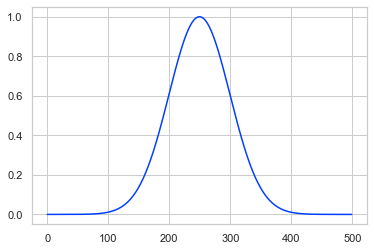

In [55]:
import math
import numpy.fft as FFT
def inverse_mag_phase(df1, df2):
    mag = df1['Ampli'].to_numpy()
    phase = df2['Phase'].to_numpy()
    for_ifft = [[] for i in range(len(mag))]
    for i in range(len(mag)):
            rl = mag[i]*math.cos(phase[i])
            im = mag[i]*math.sin(phase[i])
            for_ifft[i].append(complex(rl,im))
    ifftc = FFT.ifft2(for_ifft)
    return ifftc
ifft_mag_phase1 = inverse_mag_phase(freq_ampli_mag1, freq_ampli_phase1)
plt.plot(ifft_mag_phase1)

In [56]:
from scipy.spatial import distance
distance.euclidean(s,ifft_mag_phase1)

2.673254030430671e-15

<StemContainer object of 3 artists>

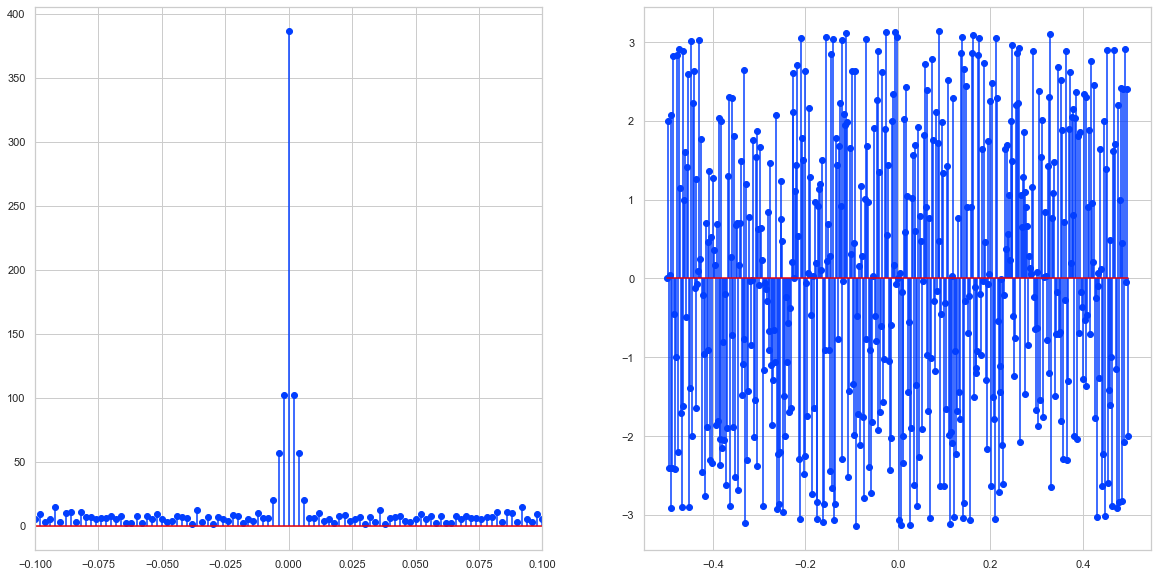

In [57]:
freq_ampli_mag2 = freq_mag(signal_2)
freq_ampli_phase2 = freq_phase(signal_2)
fig, axs = plt.subplots(1,2,figsize=(20,10))
axs[0].stem(freq_ampli_mag2['Freq'], freq_ampli_mag2['Ampli'])
axs[0].set_xlim(-0.1, 0.1)
axs[1].stem(freq_ampli_phase2['Freq'], freq_ampli_phase2['Phase'])

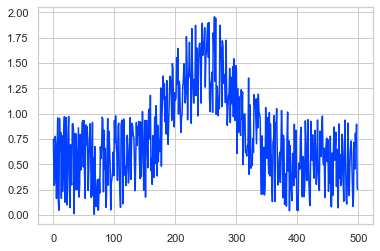

In [58]:
ifft_mag_phase2 = inverse_mag_phase(freq_ampli_mag2, freq_ampli_phase2)
plt.plot(ifft_mag_phase2)

In [59]:
distance.euclidean(s2,ifft_mag_phase2)

5.1722347112594685e-15

In [60]:
print("Magnitude: ",(wasserstein_distance(freq_ampli_mag1['Ampli'], freq_ampli_mag2['Ampli'])))
print("Phase", wasserstein_distance(freq_ampli_phase1['Phase'], freq_ampli_phase2['Phase']))

Magnitude:  5.958217446591089
Phase 0.7298656844907722


In [61]:
freq_ampli_mag1.rename(columns = {'Ampli':'Value'}, inplace = True)
freq_ampli_mag2.rename(columns = {'Ampli':'Value'}, inplace = True)
print(jaccard(freq_ampli_mag1,freq_ampli_mag2))
freq_ampli_mag1.rename(columns = {'Value': 'Ampli'}, inplace = True)
freq_ampli_mag2.rename(columns = {'Value': 'Ampli'}, inplace = True)

0.9960238568588469


In [62]:
freq_ampli_phase1.rename(columns = {'Phase':'Value'}, inplace = True)
freq_ampli_phase2.rename(columns = {'Phase':'Value'}, inplace = True)
print(jaccard(freq_ampli_phase1,freq_ampli_phase2))
freq_ampli_phase1.rename(columns = {'Value': 'Phase'}, inplace = True)
freq_ampli_phase2.rename(columns = {'Value': 'Phase'}, inplace = True)

0.3678474114441417


# Cepstrum

In [63]:
from acoustics.cepstrum import complex_cepstrum
from acoustics.cepstrum import inverse_complex_cepstrum

In [64]:
duration = signal_1.shape[0]
fs = 1.0
samples = int(fs*duration)
t = np.arange(samples) / fs
ceps1, _ = complex_cepstrum(signal_1['Value'])
print(ceps1)

[-1.45905452e+01  1.02522319e+01  5.18030791e+00  3.55235685e+00
  2.64538538e+00  2.18262735e+00  1.77432101e+00  1.57238194e+00
  1.31789630e+00  1.21447571e+00  1.02690862e+00  9.71179332e-01
  8.18820461e-01  7.90001270e-01  6.58694461e-01  6.46838551e-01
  5.29414538e-01  5.29244986e-01  4.21749417e-01  4.30257704e-01
  3.30369953e-01  3.45744383e-01  2.52032873e-01  2.73129561e-01
  1.84668620e-01  2.10729228e-01  1.26887988e-01  1.57379763e-01
  7.76995911e-02  1.12220560e-01  3.63411753e-02  7.45622461e-02
  2.17620638e-03  4.38053761e-02 -2.53700298e-02  1.93903980e-02
 -4.68492576e-02  7.67911621e-04 -6.28125178e-02 -1.26174595e-02
 -7.38211799e-02 -2.13338335e-02 -8.04501322e-02 -2.59622758e-02
 -8.32855274e-02 -2.70924980e-02 -8.29187926e-02 -2.53155210e-02
 -7.99382330e-02 -2.12144856e-02 -7.49192810e-02 -1.53545323e-02
 -6.84142174e-02 -8.27254127e-03 -6.09420803e-02 -4.67353233e-04
 -5.29793148e-02  7.60901910e-03 -4.49516472e-02  1.55587840e-02
 -3.72275113e-02  2.30440

In [65]:
duration = signal_2.shape[0]
fs = 1.0
samples = int(fs*duration)
t = np.arange(samples) / fs
ceps2, _ = complex_cepstrum(signal_2['Value'])
print(ceps2)

[ 1.57638488e+00 -7.53616694e+00  2.67891512e+00 -1.97398643e-01
  3.58992988e-01  1.89239326e+00  5.91988340e-01  4.00864470e-02
 -3.23988331e-01 -3.69514764e-01 -5.44861088e-02  1.96215293e-01
 -5.67071316e-01  6.94070331e-01  4.05407064e-01  2.96206625e-01
 -8.11347712e-01 -5.48495150e-02 -2.31148325e-01 -3.42470870e-01
 -4.28074506e-01  1.43368088e-01 -1.15768130e-01  2.55778557e-01
  2.09101617e-01  2.19090849e-01 -7.75769189e-02  2.73059576e-01
  2.05705997e-02 -1.37518793e-01 -3.79721513e-02 -3.28146252e-01
 -2.63907172e-01 -2.16152730e-02 -1.90610624e-01 -3.99029030e-01
  2.53783519e-01  9.86041724e-02  2.61981945e-01  9.91584022e-03
 -7.19634076e-02  8.80628964e-03 -2.96593510e-01  1.14805514e-01
 -2.26971112e-01  4.79102979e-02  6.71088249e-02  1.66770426e-01
  1.16013567e-01 -1.78611953e-01  1.35726718e-01  2.13246734e-01
  1.56450861e-01  2.86461660e-01  1.29576261e-01 -2.52210942e-02
 -1.16899814e-01  9.80689381e-02 -3.64556561e-02  3.95620483e-02
  1.31466634e-01 -1.91500

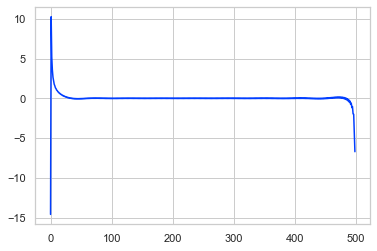

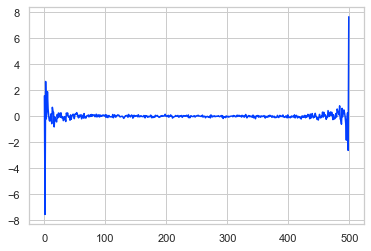

In [66]:
plt.plot(ceps1)
plt.show()
plt.plot(ceps2)

In [67]:
print(wasserstein_distance(ceps1,ceps2))

0.0993525485911487


In [68]:
cepstrum1 = pd.DataFrame(ceps1,columns=['Value'])
cepstrum2 = pd.DataFrame(ceps2,columns=['Value'])

In [69]:
print(jaccard(cepstrum1,cepstrum2))

0.9647749510763209


## Results

In [70]:
from prettytable import PrettyTable

+-------------+---------------+---------------+-------------------+--------------------+
| Signal Type |    Signal 1   |    Signal 2   |        EMD        |      Jaccard       |
+-------------+---------------+---------------+-------------------+--------------------+
| Time Series | Multi Sines 1 | Multi Sines 2 | 0.521558771662884 | 0.2954838709677419 |
+-------------+---------------+---------------+-------------------+--------------------+


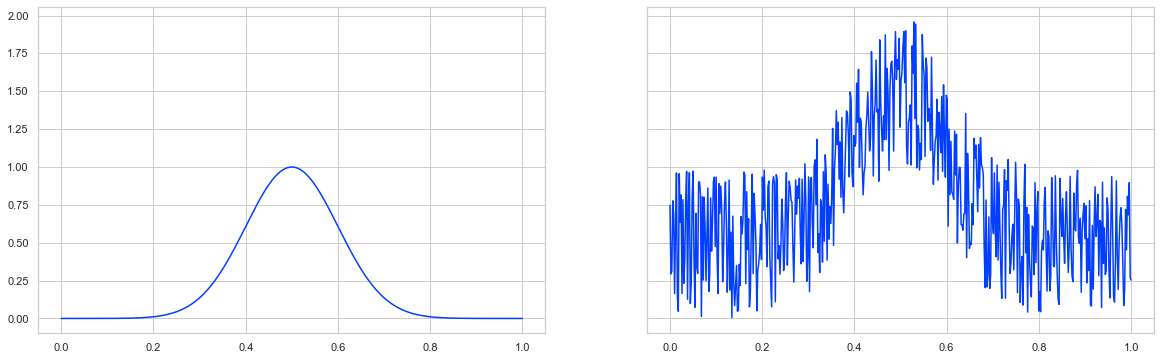

In [71]:
fig, axs = plt.subplots(1,2,figsize=(20,6), sharex=True, sharey=True)
axs[0].plot(signal_1["Time"],signal_1['Value'])
axs[1].plot(signal_2["Time"],signal_2['Value'])
table = PrettyTable(['Signal Type','Signal 1','Signal 2','EMD','Jaccard'])
table.add_row(['Time Series','Multi Sines 1','Multi Sines 2',wasserstein_distance(s,s2),jaccard(signal_1,signal_2)])
print(table)

+-------------+---------------+---------------+--------------------+--------------------+
| Signal Type |    Signal 1   |    Signal 2   |        EMD         |      Jaccard       |
+-------------+---------------+---------------+--------------------+--------------------+
|    Freq_R   | Multi Sines 1 | Multi Sines 2 | 3.927229942175582  | 0.8354661791590493 |
|    Freq_I   | Multi Sines 1 | Multi Sines 2 | 3.4850204784955356 | 0.1895734597156398 |
+-------------+---------------+---------------+--------------------+--------------------+


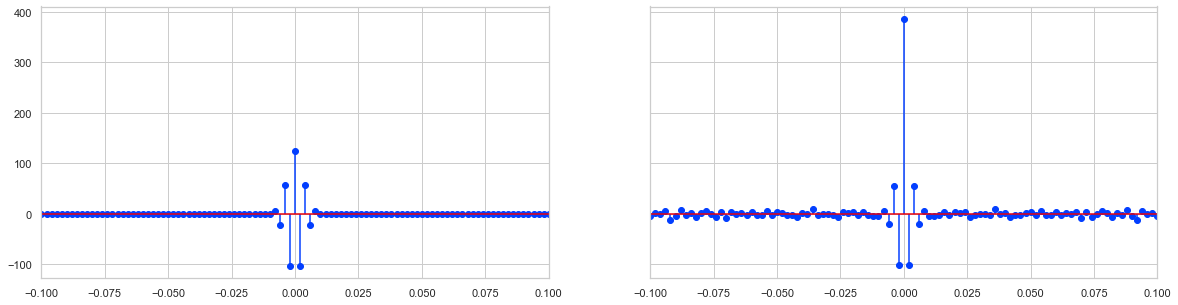

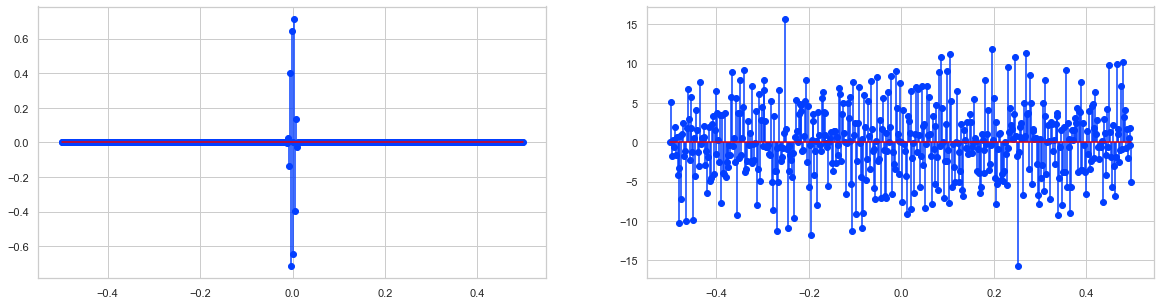

In [78]:
fig, axs = plt.subplots(1,2,figsize=(20,5),sharex=True, sharey=True)
axs[0].stem(freq_ampli1['Freq'], freq_ampli1['Ampli'])
axs[0].set_xlim(-0.1, 0.1)
axs[1].stem(freq_ampli2['Freq'], freq_ampli2['Ampli'])
axs[1].set_xlim(-0.1, 0.1)

fig, axs = plt.subplots(1,2,figsize=(20,5),sharex=True)
axs[0].stem(freq_ampli1i['Freq'], freq_ampli1i['Ampli'])
axs[1].stem(freq_ampli2i['Freq'], freq_ampli2i['Ampli'])

table2 = PrettyTable(['Signal Type','Signal 1','Signal 2','EMD','Jaccard'])
table2.add_row(['Freq_R','Multi Sines 1','Multi Sines 2',3.927229942175582,0.8354661791590493])
table2.add_row(['Freq_I','Multi Sines 1','Multi Sines 2',3.4850204784955356,0.1895734597156398])
print(table2)

+-------------+---------------+---------------+--------------------+--------------------+
| Signal Type |    Signal 1   |    Signal 2   |        EMD         |      Jaccard       |
+-------------+---------------+---------------+--------------------+--------------------+
|   Freq_Mag  | Multi Sines 1 | Multi Sines 2 | 5.958217446591089  | 0.9960238568588469 |
|  Freq_Phase | Multi Sines 1 | Multi Sines 2 | 0.7298656844907722 | 0.3678474114441417 |
+-------------+---------------+---------------+--------------------+--------------------+


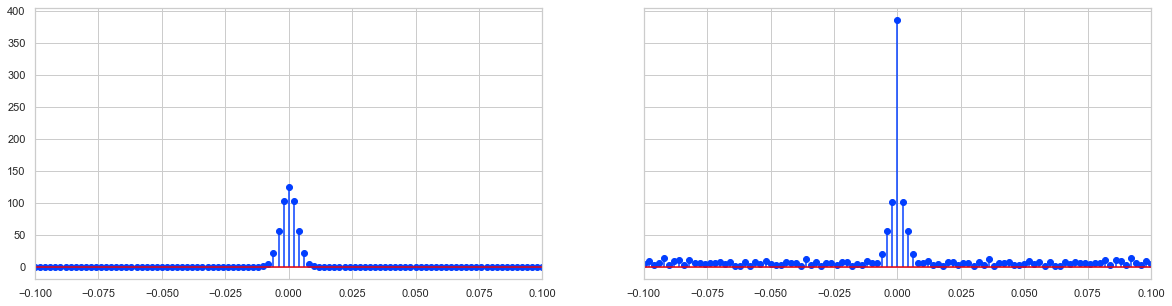

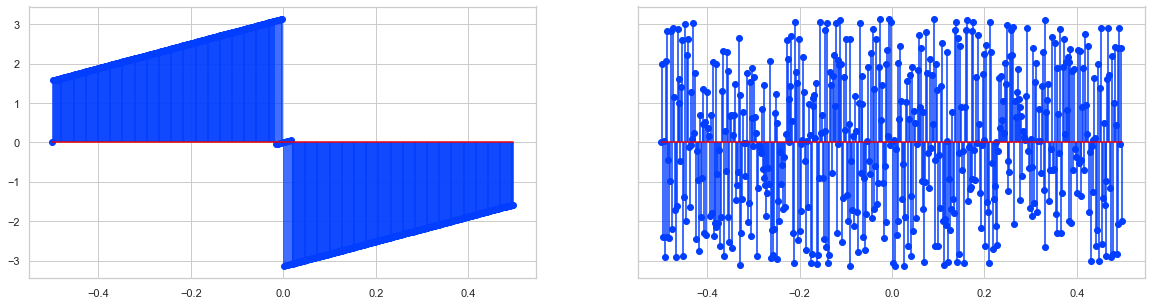

In [79]:
fig, axs = plt.subplots(1,2,figsize=(20,5), sharex=True, sharey=True)
axs[0].stem(freq_ampli_mag1['Freq'], freq_ampli_mag1['Ampli'])
axs[0].set_xlim(-0.1, 0.1)
axs[1].stem(freq_ampli_mag2['Freq'], freq_ampli_mag2['Ampli'])
axs[1].set_xlim(-0.1, 0.1)

fig, axs = plt.subplots(1,2,figsize=(20,5),sharex=True, sharey=True)
axs[0].stem(freq_ampli_phase1['Freq'], freq_ampli_phase1['Phase'])
axs[1].stem(freq_ampli_phase2['Freq'], freq_ampli_phase2['Phase'])

table3 = PrettyTable(['Signal Type','Signal 1','Signal 2','EMD','Jaccard'])
table3.add_row(['Freq_Mag','Multi Sines 1','Multi Sines 2',5.958217446591089,0.9960238568588469])
table3.add_row(['Freq_Phase','Multi Sines 1','Multi Sines 2',0.7298656844907722,0.3678474114441417])
print(table3)

+-------------+---------------+---------------+--------------------+--------------------+
| Signal Type |    Signal 1   |    Signal 2   |        EMD         |      Jaccard       |
+-------------+---------------+---------------+--------------------+--------------------+
|   Cepstrum  | Multi Sines 1 | Multi Sines 2 | 0.0993525485911487 | 0.9647749510763209 |
+-------------+---------------+---------------+--------------------+--------------------+


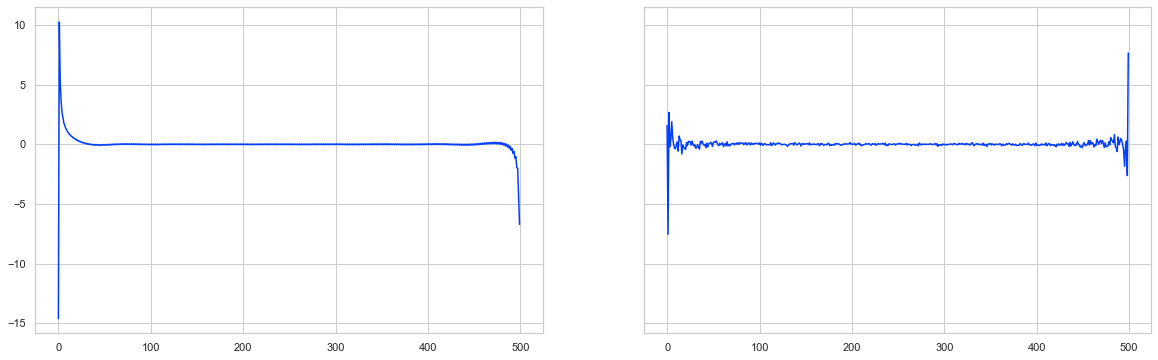

In [80]:
fig, axs = plt.subplots(1,2,figsize=(20,6), sharex = True, sharey = True)
axs[0].plot(ceps1)
axs[1].plot(ceps2)
table4 = PrettyTable(['Signal Type','Signal 1','Signal 2','EMD','Jaccard'])
table4.add_row(['Cepstrum','Multi Sines 1','Multi Sines 2',wasserstein_distance(ceps1,ceps2),jaccard(cepstrum1,cepstrum2)])
print(table4)